# FWHM als Funktion von $\rho \cdot x$

mit $$\rho(p) = \frac{\rho_0}{p_0} \cdot p$$

wobei $\rho_0 = 1,225 \frac{kg}{m^3}$ und $p_0 = 1013mbar$

damit ist FWHM als Funktion von $$\rho(p)\cdot x$$ mit $x = 34\pm 0,5 mm$ gewählter Abstand und Fehler $\Delta \rho(p) = \frac{\rho_0}{p_0} \cdot \Delta p \Rightarrow \Delta \rho(p)\cdot x = \sqrt{(p\Delta x)^2 + (x\Delta p)^2}$

In [72]:
using Plots, CSV, DataFrames, LsqFit, LaTeXStrings


In [54]:
p_0 = 1013 #mbar
rho_0 = 1.225 #kg/m^3
x = 34.0 #mm
D_x = 0.5 #mm
energystragg_data = CSV.read("../data/energie_straggling.csv", DataFrame)

Row,Druck[mbar],ΔDruck[mbar],Zeit[s],E[keV],ΔE[keV],FWHM[keV],ΔFWHM[keV],Peaks
,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,0.131,0.191,300,5489.7,0.5,50.5,0.9,3
2,100.0,10.0,120,4912.6,0.7,71.6,1.6,2
3,220.0,10.0,120,4265.3,1.5,82.7,2.0,2
4,300.0,10.0,120,3807.2,0.7,114.5,1.2,1
5,400.0,10.0,120,3202.3,0.8,125.0,1.4,1
6,450.0,10.0,120,2871.2,0.8,134.0,1.5,1
7,500.0,10.0,120,2532.9,0.8,140.0,1.6,1
8,550.0,10.0,120,2209.1,0.9,153.1,1.8,1
9,600.0,10.0,120,1794.9,1.0,159.4,1.9,1


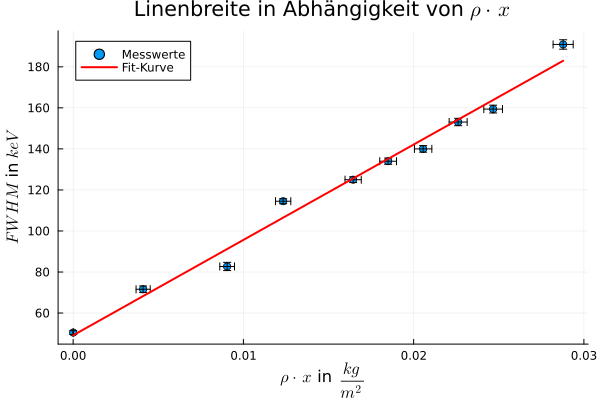

In [ ]:


ps = energystragg_data[1:10, 1] #mbar
D_ps = energystragg_data[1:10,2] #mbar
ss = energystragg_data[1:10,3] #seconds
Es = energystragg_data[1:10,4] #keV
D_Es = energystragg_data[1:10,5] #keV
FWHMs = energystragg_data[1:10,6] #keV
D_FWHMs = energystragg_data[1:10,7] #keV

rhos = rho_0 / p_0 .* ps
D_rhos = rho_0/p_0 .* D_ps
rho_xs = rhos .* x * 1e-3
D_rho_xs = sqrt.((rhos .* D_x*1e-3).^2 + (x*1e-3 * D_rhos).^2)

# Fit-Funktion definieren (lineare Regression)
fit_model(x, p) = p[1] * x .+ p[2]

# Fit durchführen
initial_params = [(FWHMs[1] - FWHMs[end]) / (rho_xs[1] - rho_xs[end])*0.7, 1.]  # Anfangsschätzungen für die Parameter
fit_result = curve_fit(fit_model, rho_xs, FWHMs, initial_params)
fit_params = fit_result.param  # Angepasste Parameter (Steigung, Achsenabschnitt)

# Berechne den Bereich für die Fit-Kurve (1/p_means)
p_fit = range(minimum(rho_xs), maximum(rho_xs), length=100)  
fit_curve = fit_model(p_fit, fit_params)  # Berechne die Fit-Kurve mit den angepassten Parametern

plot(
    rho_xs, FWHMs,
    seriestype="scatter",
    yerror=D_FWHMs, xerror=D_rho_xs,
    label="Messwerte",
    xlabel=L"\rho\cdot x" * " in " * L"\frac{kg}{m^2}",
    ylabel=L"FWHM" * " in " * L"keV",
    title="Linenbreite in Abhängigkeit von " * L"\rho \cdot x"
)

plot!(
    p_fit,
    fit_curve,
    label="Fit-Kurve",
    linewidth=2,
    color=:red
)


Nehme ann Energiestraggling bei niedrigstem Druck vernachlässigbar. D.h $E_\alpha = E_{p=min}$ mit der Energieauflösung $\Delta E_\alpha = FWHM_{p=min}$ <br>
mit relativer Energieauflösung $$\frac{\Delta E_\alpha}{E_\alpha}$$

In [56]:
E_alpha = Es[1]
D_E_alpha = FWHMs[1]
D_D_E_alpha = D_FWHMs[1]

rel_energy_res = D_E_alpha/E_alpha

0.00919904548518134

Energestragglingparameter ergibt sich so
$$
    \alpha = \sqrt{(FWHM^2 - \Delta E_\alpha^2)}
$$

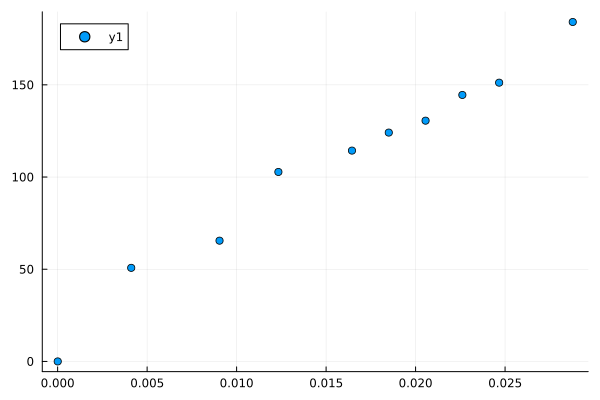

In [57]:
function alpha(FWHM)
    return sqrt(FWHM^2 - D_E_alpha^2)
end

alphas = alpha.(FWHMs)

plot(
    rho_xs, alphas,
    seriestype="scatter"
)